|Name:|Tufan Kundu|
|--|--|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:| 4|
|Date:|07 August,2025|

## Question1. 
### cifar10 dataset is also an inbuilt dataset which contains 10 classes of images, mainly, 0-airplane, 1-automobile, 2-bird, 3-cat, 4-deer, 5-dog, 6-frog, 7-horse, 8-ship, 9-truck.Load the inbuilt dataset cifar10 as you did in last lab by replacing mnist.load datae() as cifar10.load data(). First, try to import it from keras.datasets as you did for mnist. Now, identify the size of the images you have first of all. You can now see 32 * 32 * 3 images that is 32* 32 pixel images with 3 channels that give the RGB values since we have a color image. Try to print the shape of each image and see. you will see it’s stored like 32 * 32 *3 arrays. Now, try to visualize certain images using appropriate functions. Check the size of x train and x test and reshape them into one-dimensional arrays as done in the case of mnist dataset. Do necessary pre-processing and split the data into training, validation, and testing sets. Create a new model using a sequential class with appropriate hidden layers and output layer neurons. Choose appropriate activation functions like sigmoid and relu, etc. And also an appropriate one in the output layer. Choose the error function appropriately. Include early stopping technique in your model and run the model for 500 epochs. Try to come up with a better model with decent accuracy.The choice we have taken in the model here may not be the appropriate one. But you can see the accuracy you are able to come up with without having overfitting happen there.

### Importing the necessary libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset and validation split

In [2]:

(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_subtrain,x_valid,y_subtrain,y_valid = train_test_split(x_train,y_train,test_size = 0.10, random_state = 1)

In [3]:
x_subtrain.shape

(45000, 32, 32, 3)

In [4]:
x_valid.shape

(5000, 32, 32, 3)

In [5]:
x_train = x_train/255
x_test = x_test/255
x_subtrain = x_subtrain/255
x_valid=x_valid/255

In [6]:
# Flattening images
x_subtrain_flat = x_subtrain.reshape(x_subtrain.shape[0], -1)
x_valid_flat = x_valid.reshape(x_valid.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


### Some random images from the dataset along with their labels

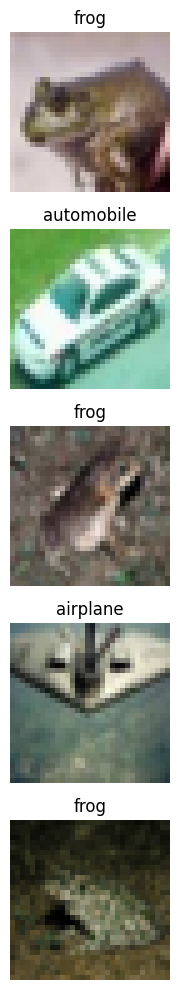

In [7]:
import numpy as np

# Mapping of label numbers to class names
label_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

# Picking 5 random indexes
random_indices = np.random.choice(len(x_train), size=5, replace=False)

# Plotting the images with labels
plt.figure(figsize=(2, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 1, i+1)
    plt.imshow(x_train[idx])
    plt.title(label_names[int(y_train[idx])])
    plt.axis('off')

plt.tight_layout()
plt.show()


### One hot encoding the target labels

In [8]:
y_subtrain_cat = to_categorical(y_subtrain, 10)
y_valid_cat = to_categorical(y_valid, 10)
y_test_cat = to_categorical(y_test, 10)

### Building the model architecture

- without regularization or dropout layer

In [9]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (3072,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and running the model

In [10]:
from keras.callbacks import EarlyStopping

model.compile(loss= 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])

estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.2560 - loss: 2.0684 - val_accuracy: 0.3682 - val_loss: 1.7572
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.3828 - loss: 1.7197 - val_accuracy: 0.4058 - val_loss: 1.6656
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4161 - loss: 1.6222 - val_accuracy: 0.4348 - val_loss: 1.5834
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4461 - loss: 1.5489 - val_accuracy: 0.4474 - val_loss: 1.5419
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4561 - loss: 1.5217 - val_accuracy: 0.4582 - val_loss: 1.5119
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4714 - loss: 1.4676 - val_accuracy: 0.4630 - val_loss: 1.5148
Epoch 7/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4797 - loss: 1.4425 - val_accuracy: 0.4648 - val_loss: 1.4954
Epoch 8/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4936 - loss: 1.4167 - 

In [11]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5147 - loss: 1.3745
Test loss: 1.3802433013916016
Test Accuracy:51.24%


### Plot of accuracy and loss curves

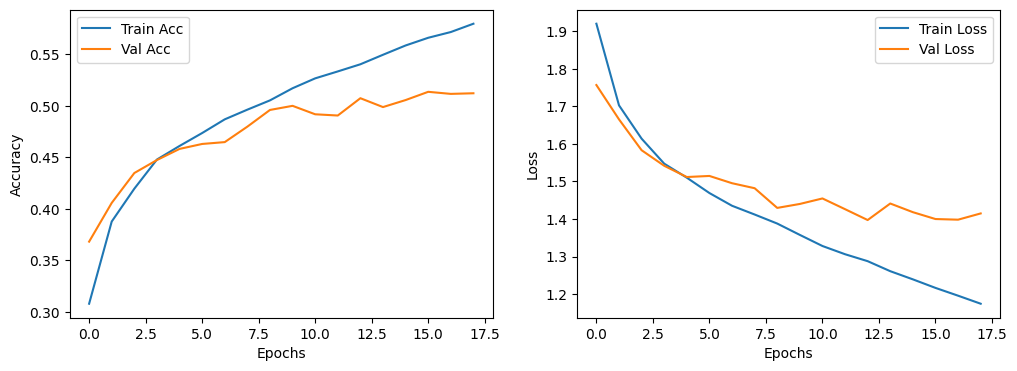

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Model with dropout layers

In [13]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (3072,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.callbacks import EarlyStopping

model.compile(loss= 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])

estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.1842 - loss: 2.2121 - val_accuracy: 0.3268 - val_loss: 1.8759
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2816 - loss: 1.9531 - val_accuracy: 0.3434 - val_loss: 1.8363
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3115 - loss: 1.8760 - val_accuracy: 0.3528 - val_loss: 1.8145
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3180 - loss: 1.8586 - val_accuracy: 0.3782 - val_loss: 1.7551
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3368 - loss: 1.8156 - val_accuracy: 0.3852 - val_loss: 1.7358
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3440 - loss: 1.8036 - val_accuracy: 0.3888 - val_loss: 1.7243
Epoch 7/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3497 - loss: 1.7884 - val_accuracy: 0.3952 - val_loss: 1.7348
Epoch 8/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3508 - loss: 1.7793 - 

In [15]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4332 - loss: 1.6129
Test loss: 1.6181273460388184
Test Accuracy:42.77%


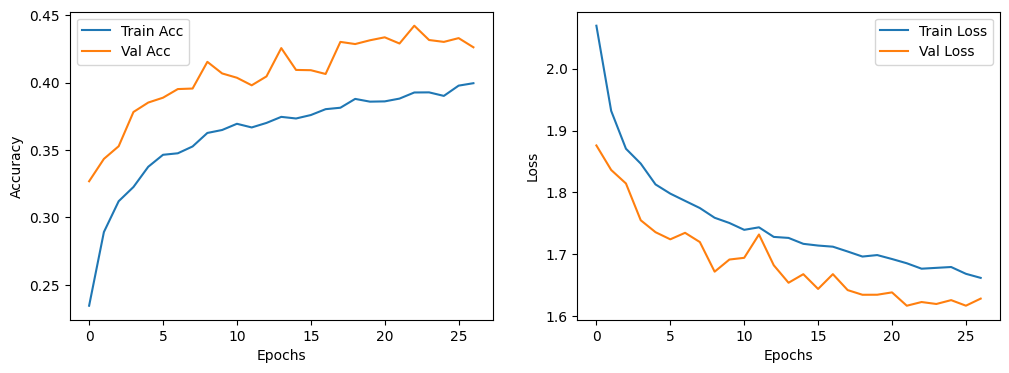

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Question 2. Next from keras.regularizers import l2

### Model building with l2 regularizer

In [17]:
model = Sequential()
model.add(Dense(512, activation = 'relu', kernel_regularizer=l2(0.0001),input_shape = (3072,)))
model.add(Dense(256, activation = 'relu',kernel_regularizer=l2(0.0001)))
model.add(Dense(128, activation = 'relu',kernel_regularizer=l2(0.005)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

### Without using early stopping

In [18]:
model.compile(loss= 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])

estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2607 - loss: 2.5374 - val_accuracy: 0.3722 - val_loss: 1.9370
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3840 - loss: 1.8760 - val_accuracy: 0.3990 - val_loss: 1.7970
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4189 - loss: 1.7371 - val_accuracy: 0.4308 - val_loss: 1.6991
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4434 - loss: 1.6589 - val_accuracy: 0.4458 - val_loss: 1.6265
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4595 - loss: 1.5964 - val_accuracy: 0.4686 - val_loss: 1.5991
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.4590 - loss: 1.5873 - val_accuracy: 0.4532 - val_loss: 1.6343
Epoch 7/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4798 - loss: 1.5413 - val_accuracy: 0.4882 - val_loss: 1.5392
Epoch 8/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4831 - loss: 1.5177 -

In [19]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5274 - loss: 1.4415
Test loss: 1.4469878673553467
Test Accuracy:52.47%


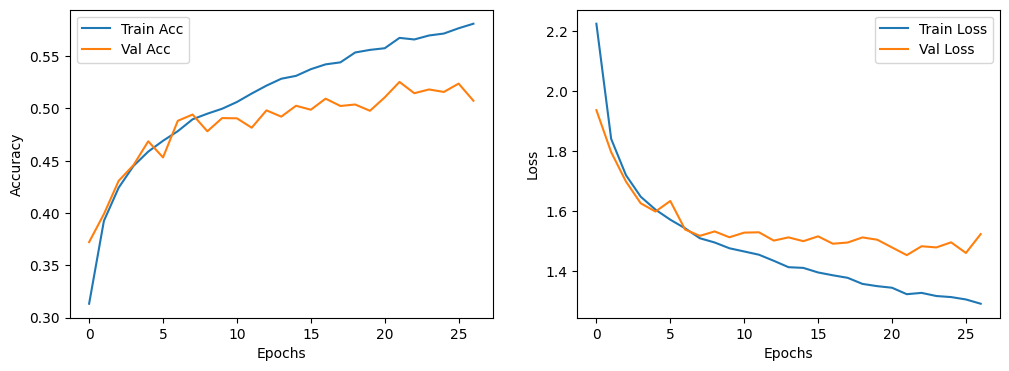

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### using early stopping along with l2 regularization

In [21]:
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5711 - loss: 1.3070 - val_accuracy: 0.5150 - val_loss: 1.4786
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5783 - loss: 1.2931 - val_accuracy: 0.5142 - val_loss: 1.4875
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5794 - loss: 1.2908 - val_accuracy: 0.4956 - val_loss: 1.5313
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5760 - loss: 1.3100 - val_accuracy: 0.5176 - val_loss: 1.4937
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.5832 - loss: 1.2825 - val_accuracy: 0.5192 - val_loss: 1.4830
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5918 - loss: 1.2663 - val_accuracy: 0.5074 - val_loss: 1.4971
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


In [22]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5247 - loss: 1.4667
Test loss: 1.4740374088287354
Test Accuracy:52.23%


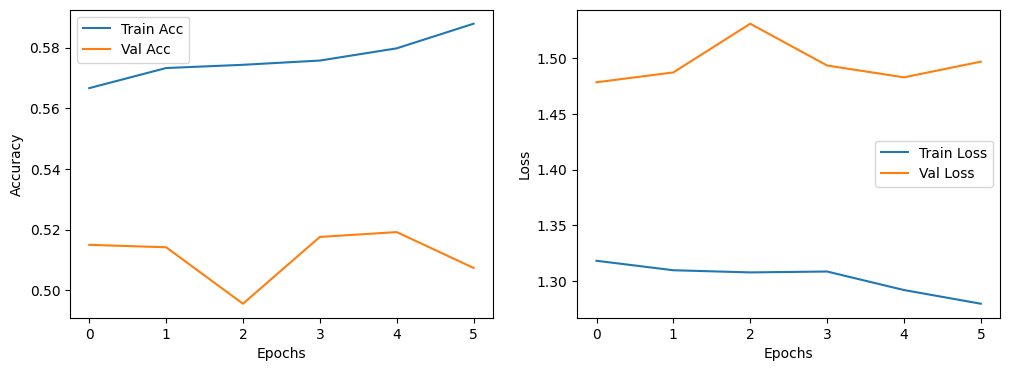

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Question 3: Now, let’s see how we can proceed to do perform some hyperparameter tuning and find out the appropriate parameter value. The following part is done for a very simple model with one hidden layer and an output layer. The number of neurons and the dropout parameter is being tuned to find appropriate ones.

In [24]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD,Adam
import keras_tuner as kt 

In [25]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(-1,28*28).astype('float32')/255.0
x_test = x_test.reshape(-1,28*28).astype('float32')/255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


In [26]:
y_train_ = to_categorical(y_train,10)
y_test_ = to_categorical(y_test,10)

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape= (28*28,)))

    units = hp.Int('units', min_value = 64, max_value = 512, step = 64)
    model.add(Dense(units,activation = 'relu'))
    dropout_rate = hp.Float('dropout',min_value = 0.0, max_value = 0.5, step = 0.1)
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(
        optimizer = SGD(), 
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [27]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 10,
    executions_per_trial = 1,
    directory = 'mnist_tuning',
    project_name = 'dense_dropout_tune',
    overwrite=True
)

tuner.search(x_train,y_train_, epochs = 10, validation_split = 0.2,batch_size = 128,callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)])
best_model = tuner.get_best_models(num_models = 1)[0]

test_loss, test_acc = best_model.evaluate(x_test,y_test_)
print("Test Accuracy:",test_acc)

best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Units:", best_hps.get('units'))
print("Best dropout:",best_hps.get('dropout'))



Trial 10 Complete [00h 00m 16s]
val_accuracy: 0.921833336353302

Best val_accuracy So Far: 0.925000011920929
Total elapsed time: 00h 02m 52s
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.3172
Test Accuracy: 0.9225999712944031
Best Units: 448
Best dropout: 0.1


In [28]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 448)            │       351,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         4,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,170 (1.36 MB)

 Trainable params: 356,170 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = best_model.fit(x_train,y_train_, batch_size=128, epochs = 50, verbose = 1, validation_split=0.2,callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9168 - loss: 0.2981 - val_accuracy: 0.9263 - val_loss: 0.2661
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9207 - loss: 0.2882 - val_accuracy: 0.9287 - val_loss: 0.2594
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9205 - loss: 0.2805 - val_accuracy: 0.9301 - val_loss: 0.2527
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9249 - loss: 0.2692 - val_accuracy: 0.9318 - val_loss: 0.2469
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9255 - loss: 0.2646 - val_accuracy: 0.9323 - val_loss: 0.2413
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9253 - loss: 0.2611 - val_accuracy: 0.9342 - val_loss: 0.2360
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9278 - loss: 0.2540 - val_accuracy: 0.9352 - val_loss: 0.2313
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9305 - loss: 0.2426 - val_accuracy: 0.

In [30]:
score = best_model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9539 - loss: 0.1537
Test loss: 0.1308669000864029
Test Accuracy:96.08%


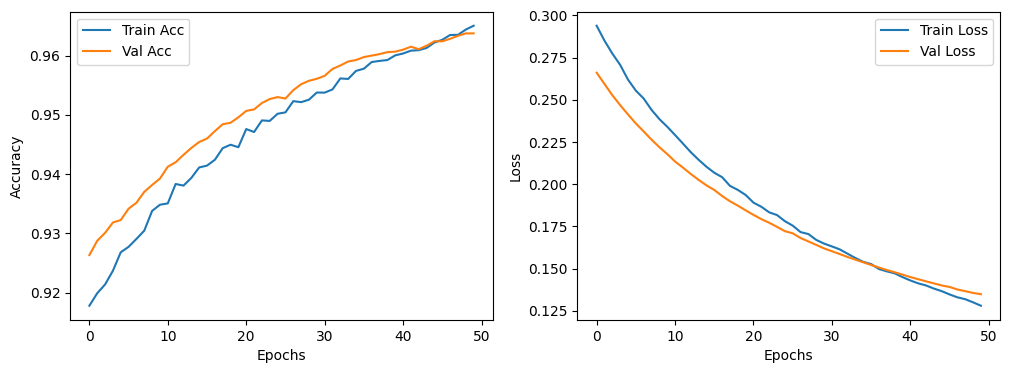

In [31]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tuning further parameters like 
- Number of hidden layers
- units per layers 
- dropout per layer 
- optimizer type 
- learning rate 

In [32]:
from tensorflow import keras 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout 
from keras.utils import to_categorical
import keras_tuner as kt 
from keras.regularizers import l2
import numpy as np 

### Loading and preprocessing the dataset 

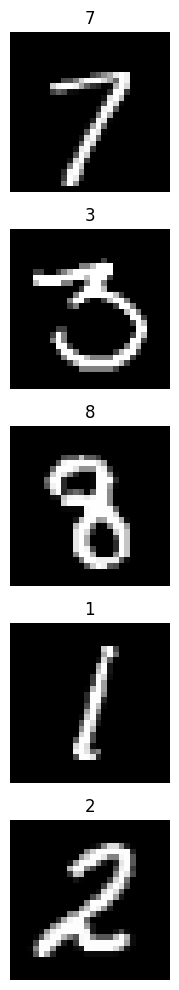

In [33]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Plotting some random images from the dataset
random_indices = np.random.choice(len(x_train), size=5, replace=False)
plt.figure(figsize=(2, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 1, i+1)
    plt.imshow(x_train[idx],cmap = 'gray')
    plt.title(int(y_train[idx]))
    plt.axis('off')

plt.tight_layout()
plt.show()

x_train = x_train.reshape(-1,28*28).astype('float32')/255.0
x_test = x_test.reshape(-1,28*28).astype('float32')/255.0
y_train_ = to_categorical(y_train,10)
y_test_ = to_categorical(y_test, 10)

### Building model for tuner
- with L2 regularization

In [34]:
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape = (784,)))
    
    ## Tuning the number of layers 
    for i in range(hp.Int('num_layers',1,3)):
        model.add(Dense(
            ## no of nodes in each layer
            units = hp.Int(f'units_{i}', min_value = 64, max_value = 512, step = 64),
            activation = 'relu',
            kernel_regularizer=l2(
                hp.Choice(f'l2_{i}', values = [0.0,1e-4,1e-3,1e-2])
            )
        ))
        ## Tuning the dropout rate
        model.add(Dropout(
            rate = hp.Float(f'dropout_{i}', min_value = 0.0,max_value = 0.5, step = 0.05)
        ))
        
    ## output layer 
    model.add(Dense(10, activation = 'softmax'))
    
    ## Tuning the optimizer type and the learning rate
    optimizer_choice = hp.Choice('optimizer', values = ['adam','sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])
    
    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(
        optimizer = optimizer,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model


In [35]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials=20,
    executions_per_trial = 2,
    overwrite = True,
    directory = 'mnist_tuning',
    project_name = 'advanced_dense_tune'
)

tuner.search(
    x_train,y_train_,
    epochs = 10,
    validation_split = 0.2,
    batch_size = 128,
    callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)


Trial 20 Complete [00h 01m 06s]
val_accuracy: 0.2356249988079071

Best val_accuracy So Far: 0.9785416424274445
Total elapsed time: 00h 13m 59s


In [36]:
# best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
for key in best_hps.values.keys():
    print(f"{key}: {best_hps.get(key)}")

# Final training
history = best_model.fit(
    x_train, y_train_,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)

# Evaluate
score = best_model.evaluate(x_test, y_test_, verbose=1)
print("Test loss:", score[0])
print(f"Test Accuracy: {score[1]*100:.2f}%")

Best Hyperparameters:
num_layers: 1
units_0: 320
l2_0: 0.0
dropout_0: 0.35000000000000003
optimizer: adam
learning_rate: 0.001
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9787 - val_loss: 0.0748
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9879 - loss: 0.0404 - val_accuracy: 0.9766 - val_loss: 0.0782
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9869 - loss: 0.0436 - val_accuracy: 0.9797 - val_loss: 0.0710
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9892 - loss: 0.0369 - val_accuracy: 0.9800 - val_loss: 0.0698
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9808 - val_loss: 0.0687
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9913 - loss: 0.0283 - val_accuracy: 0.9818 - val_loss: 0.0683
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9

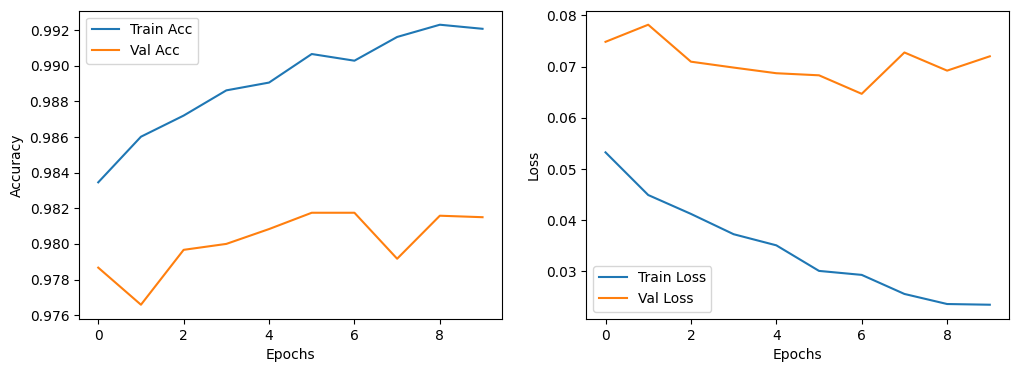

In [37]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Then later go back to the cifar10 dataset problem and come up with your best model

### hyper parameter tuning for cifar 10 dataset

### importing the necessary libraries

In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.regularizers import l2 
from keras.utils import to_categorical 
import keras_tuner as kt 

### loading the cifar10 dataset 

In [45]:

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

# class label mapping 
label_map = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

### Showing some sample images 

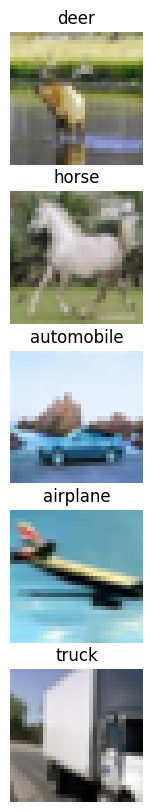

In [46]:
idx = np.random.choice(len(x_train), 5, replace = False)
plt.figure(figsize = (2,10))
for i, id in enumerate(idx):
    plt.subplot(5,1,i+1)
    plt.imshow(x_train[id])
    plt.title(label_map[int(y_train[id])])
    plt.axis('off')
plt.show()


### preprocessing the dataset


In [47]:
## normalizing 
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train = x_train.reshape(-1,32*32*3)
x_test = x_test.reshape(-1,32*32*3)

y_train_ = to_categorical(y_train,10) 
y_test_ = to_categorical(y_test,10)


### model building for hyperparameter tuning 

In [48]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(32*32*3,)))
    # Tune number of hidden layers (1–3)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=128, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=l2(hp.Choice(f'l2_{i}', values=[0.0, 1e-4, 1e-3]))
        ))
        model.add(Dropout(
            rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        ))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    # Tune optimizer type & learning rate
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


### Hyperparameter Tuner 

In [49]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='cifar10_tuning',
    project_name='dense_dropout_l2_tune'
)

tuner.search(
    x_train, y_train_,
    epochs=20,
    validation_split=0.2,
    batch_size=128,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)

Trial 10 Complete [00h 01m 08s]
val_accuracy: 0.49480000138282776

Best val_accuracy So Far: 0.5066999793052673
Total elapsed time: 00h 11m 37s


### Best model and hyperparameters

In [50]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
print("\nBest Hyperparameters:")
for key in best_hps.values.keys():
    print(f"{key}: {best_hps.get(key)}")


Best Hyperparameters:
num_layers: 2
units_0: 512
l2_0: 0.0001
dropout_0: 0.30000000000000004
optimizer: sgd
learning_rate: 0.01
units_1: 512
l2_1: 0.001
dropout_1: 0.0
units_2: 448
l2_2: 0.0001
dropout_2: 0.0


### Training the best model

In [51]:
history = best_model.fit(
    x_train, y_train_,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5180 - loss: 1.5101 - val_accuracy: 0.4996 - val_loss: 1.5691
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5128 - loss: 1.5083 - val_accuracy: 0.5161 - val_loss: 1.5319
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5237 - loss: 1.4790 - val_accuracy: 0.5219 - val_loss: 1.5173
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5211 - loss: 1.4939 - val_accuracy: 0.5074 - val_loss: 1.5424
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5354 - loss: 1.4522 - val_accuracy: 0.5106 - val_loss: 1.5357
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5310 - loss: 1.4506 - val_accuracy: 0.5199 - val_loss: 1.5135
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5397 - loss: 1.4350 - val_accuracy: 0.5205 - val_loss: 1.5028
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5480 - loss: 1.4195 - val_accu

### Evaluating the model 

In [52]:
score = best_model.evaluate(x_test, y_test_, verbose=1)
print("Test loss:", score[0])
print(f"Test Accuracy: {score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5260 - loss: 1.4767
Test loss: 1.4811558723449707
Test Accuracy: 51.98%


### Accuracy and loss plot 

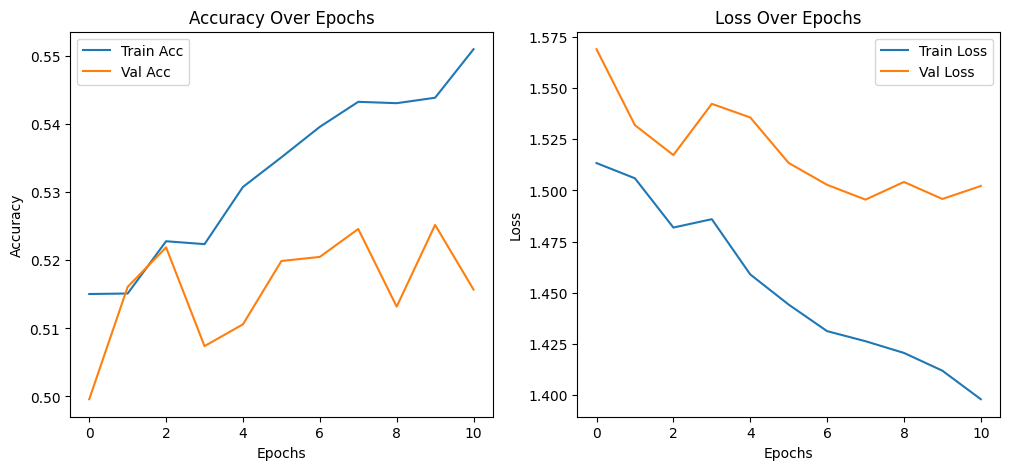

In [53]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()